In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
from wordcloud import WordCloud, STOPWORDS
import matplotlib as plty
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

import plotly.graph_objs as go
from sklearn import preprocessing
Encode = preprocessing.LabelEncoder()
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer()
vect = CountVectorizer()
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE
NB = MultinomialNB()

import nltk
from nltk.corpus import stopwords
stopwords = stopwords.words("english")
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

print(check_output(["ls", "../input"]).decode("utf8"))

ModuleNotFoundError: No module named 'sklearn.cross_validation'

In [2]:
chatbot = pd.read_csv("../input/Sheet_1.csv",usecols=['response_id','class','response_text'],encoding='latin-1')
resume = pd.read_csv("../input/Sheet_2.csv",encoding='latin-1')

****Sheet_1.csv contains 80 user responses, in the response_text column, to a therapy chatbot. Bot said: 'Describe a time when you have acted as a resource for someone else'.  User responded. If a response is 'not flagged', the user can continue talking to the bot. If it is 'flagged', the user is referred to help. ****

In [3]:
chatbot.head(5)

,response_id,class,response_text
0,response_1,not_flagged,I try and avoid this sort of conflict
1,response_2,flagged,Had a friend open up to me about his mental ad...
2,response_3,flagged,I saved a girl from suicide once. She was goin...
3,response_4,not_flagged,i cant think of one really...i think i may hav...
4,response_5,not_flagged,Only really one friend who doesn't fit into th...


In [4]:
chatbot['class'].value_counts()

not_flagged    55
flagged        25
Name: class, dtype: int64

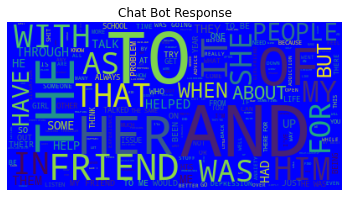

In [5]:
def cloud(text):
    wordcloud = WordCloud(background_color="blue",stopwords=stop).generate(" ".join([i for i in text.str.upper()]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Chat Bot Response")
cloud(chatbot['response_text'])

**Model Building **

In [6]:
chatbot['Label'] = Encode.fit_transform(chatbot['class'])

In [7]:
chatbot['Label'].value_counts()
#not_flagged    55
#flagged        25

1    55
0    25
Name: Label, dtype: int64

**Naive Bayes**

In [8]:
x = chatbot.response_text
y = chatbot.Label
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
x_train_dtm = vect.fit_transform(x_train)
x_test_dtm = vect.transform(x_test)
NB.fit(x_train_dtm,y_train)
y_predict = NB.predict(x_test_dtm)
metrics.accuracy_score(y_test,y_predict)






NameError: name 'train_test_split' is not defined

**Random Forest**

In [9]:
rf = RandomForestClassifier(max_depth=10,max_features=10)
rf.fit(x_train_dtm,y_train)
rf_predict = rf.predict(x_test_dtm)
metrics.accuracy_score(y_test,rf_predict)

NameError: name 'RandomForestClassifier' is not defined

In [10]:
Chatbot_Text = chatbot["response_text"]
len(Chatbot_Text)

80

In [11]:
Tf_idf = CountVectorizer(max_features=256).fit_transform(Chatbot_Text.values)

In [12]:
tsne = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=200,
    verbose=2,
    angle=0.5
).fit_transform(Tf_idf.toarray())




NameError: name 'TSNE' is not defined

In [13]:
trace1 = go.Scatter3d(
    x=tsne[:,0],
    y=tsne[:,1],
    z=tsne[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = Chatbot_Text.values,
        colorscale = 'Portland',
        colorbar = dict(title = 'TExt'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='test')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')


NameError: name 'tsne' is not defined